<a href="https://colab.research.google.com/github/weasel-codes/anomaly-detection-iot/blob/main/anomaly_detection_preprocess2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sn
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [227]:
base_url = '/content/drive/MyDrive/ML/anomaly/'
data_file = 'dataset.csv'

In [228]:
df = pd.read_csv(base_url+data_file)
if df.shape[1] > 8 :
  df = df.drop(columns=df.columns[0])

df = df[:2000]

df

,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,NaN,104.74.213.186,192.168.0.24,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,NaN,192.168.0.19,173.194.49.203,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,NaN,192.168.0.16,192.168.0.13,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,NaN,192.168.0.13,192.168.0.16,eth:ethertype:ip:tcp,0
...,...,...,...,...,...,...,...,...
1995,332399,81.109777,74,32.0,192.168.0.13,210.89.164.90,eth:ethertype:ip:udp:data,1
1996,170498,41.323999,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1
1997,354362,86.342008,74,32.0,192.168.0.13,210.89.164.90,eth:ethertype:ip:udp:data,1
1998,46609,94.161935,66,NaN,192.168.0.24,104.118.134.215,eth:ethertype:ip:tcp,0


In [229]:
df.isna().sum()

frame.number              0
frame.time_relative       0
frame.len                 0
data.len               1053
ip.src                   12
ip.dst                   12
frame.protocols           0
label                     0
dtype: int64

In [230]:
df['data.len'] = df['data.len'].fillna(0)
df['ip.src'] = df['ip.src'].fillna(method='ffill')
df['ip.dst'] = df['ip.dst'].fillna(method='ffill')
df.isna().sum()

frame.number           0
frame.time_relative    0
frame.len              0
data.len               0
ip.src                 0
ip.dst                 0
frame.protocols        0
label                  0
dtype: int64

In [231]:
df

,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,0.0,104.74.213.186,192.168.0.24,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,0.0,192.168.0.19,173.194.49.203,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,0.0,192.168.0.16,192.168.0.13,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,0.0,192.168.0.13,192.168.0.16,eth:ethertype:ip:tcp,0
...,...,...,...,...,...,...,...,...
1995,332399,81.109777,74,32.0,192.168.0.13,210.89.164.90,eth:ethertype:ip:udp:data,1
1996,170498,41.323999,74,32.0,192.168.0.24,210.89.164.90,eth:ethertype:ip:udp:data,1
1997,354362,86.342008,74,32.0,192.168.0.13,210.89.164.90,eth:ethertype:ip:udp:data,1
1998,46609,94.161935,66,0.0,192.168.0.24,104.118.134.215,eth:ethertype:ip:tcp,0


In [232]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['ip.src']= label_encoder.fit_transform(df['ip.src'])
df['ip.dst']= label_encoder.fit_transform(df['ip.dst'])
df[:5]

,frame.number,frame.time_relative,frame.len,data.len,ip.src,ip.dst,frame.protocols,label
0,88211,70.949809,1514,0.0,4,47,eth:ethertype:ip:tcp,0
1,58708,132.842376,54,0.0,56,39,eth:ethertype:ip:tcp,0
2,131894,296.013317,66,0.0,55,42,eth:ethertype:ip:tcp,0
3,252744,49.393385,74,32.0,58,50,eth:ethertype:ip:udp:data,1
4,35069,66.823389,1502,0.0,53,45,eth:ethertype:ip:tcp,0


In [233]:
# Create Entites using indexes of csv
X = df.iloc[:, :-1].values #All the rows + all the columns except last
Y = df.iloc[:,-1] #Dependent vairables is last column
X.shape, Y.shape

((2000, 7), (2000,))

In [234]:
for i in range(X.shape[0]):
  var = X[i][6].split(':')
  print(var)
  temp = ""
  if len(var) == 1 :
    X = np.delete(X, i, 0)
  elif len(var) == 2 :
    temp = temp + var[0] + ":" + var[1]
  elif len(var) == 3 :
    temp = temp + var[0] + ":" + var[1] + ":" + var[2]
  else :
    temp = temp + var[0] + ":" + var[1] + ":" + var[2] + ":" + var[3]

  X[i][6] = temp
  print(i , " : ", X[i][6])

['eth', 'ethertype', 'ip', 'tcp']
0  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
1  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
2  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
3  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp']
4  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
5  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
6  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'udp', 'data']
7  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'tcp']
8  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp']
9  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'tcp', 'ssl']
10  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
11  :  eth:ethertype:ip:udp
['eth', 'ethertype', 'ip', 'icmp', 'ip', 'tcp']
12  :  eth:ethertype:ip:icmp
['eth', 'ethertype', 'ip', 'tcp']
13  :  eth:ethertype:ip:tcp
['eth', 'ethertype', 'ip', 'udp', 'data']
14  :  eth:ethertype:ip:udp
['eth', 'ethertype

In [235]:
df = pd.DataFrame(data=X)
df[6]= label_encoder.fit_transform(df[6])
df

,0,1,2,3,4,5,6
0,88211,70.9498,1514,0,4,47,3
1,58708,132.842,54,0,56,39,3
2,131894,296.013,66,0,55,42,3
3,252744,49.3934,74,32,58,50,4
4,35069,66.8234,1502,0,53,45,3
...,...,...,...,...,...,...,...
1995,332399,81.1098,74,32,53,50,4
1996,170498,41.324,74,32,58,50,4
1997,354362,86.342,74,32,53,50,4
1998,46609,94.1619,66,0,58,2,3


In [237]:
X = df.iloc[:, 1:].values #All the rows + all the columns except first data frame num
X

array([[70.949809, 1514, 0.0, 4, 47, 3],
       [132.842376, 54, 0.0, 56, 39, 3],
       [296.013317, 66, 0.0, 55, 42, 3],
       ...,
       [86.34200799999999, 74, 32.0, 53, 50, 4],
       [94.161935, 66, 0.0, 58, 2, 3],
       [171.966947, 110, 0.0, 58, 71, 3]], dtype=object)

In [238]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,[0,1,2]] = sc.fit_transform(X[:,[0,1,2]])
X

array([[-0.3376105705398474, 1.7267654989456935, -0.3648313554503775, 4,
        47, 3],
       [0.5232546389645388, -0.6686259406779655, -0.3648313554503775, 56,
        39, 3],
       [2.7928031989554793, -0.648937791859141, -0.3648313554503775, 55,
        42, 3],
       ...,
       [-0.12352010282878613, -0.635812359313258, -0.2831327835660534,
        53, 50, 4],
       [-0.014752549284529156, -0.648937791859141, -0.3648313554503775,
        58, 2, 3],
       [1.0674392421121872, -0.5767479128567842, -0.3648313554503775, 58,
        71, 3]], dtype=object)

In [239]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) #80:20 :: Train:Test

print("Train set for X : \n", X_train)
print("\n\nTest set for X : \n", X_test)
print("\n\nTrain set for Y : \n", Y_train)
print("\n\nTest set for Y : \n", Y_test)

Train set for X : 
 [[-0.3376105705398474 1.7267654989456935 -0.3648313554503775 4 47 3]
 [1.805655344238629 -0.648937791859141 -0.3648313554503775 58 2 3]
 [0.4405909716870164 -0.4897919222403088 -0.3648313554503775 40 47 3]
 ...
 [2.7864449667428666 -0.648937791859141 -0.3648313554503775 53 45 3]
 [-0.24737510869206603 -0.635812359313258 -0.2831327835660534 58 50 4]
 [1.198806178105757 -0.1272018481602892 0.4776851671067141 117 42 3]]


Test set for X : 
 [[-1.0364094857477766 0.6078223744091624 -0.3648313554503775 46 46 3]
 [-1.280019590059852 -0.635812359313258 -0.2831327835660534 58 50 4]
 [1.3490248768979884 1.6283247548515707 -0.3648313554503775 53 45 3]
 ...
 [-0.31700034545318906 -0.635812359313258 -0.2831327835660534 58 50 4]
 [-0.31492645431537364 -0.635812359313258 -0.2831327835660534 53 50 4]
 [-0.13338958473553683 -0.5275275408097226 -0.3648313554503775 53 45 3]]


Train set for Y : 
 0       0
816     0
790     1
361     0
592     0
       ..
1791    1
1096    0
1932    

# Model Training

## Logistic Regression

In [240]:
#Creating and training the Logistic Regression model
from sklearn.linear_model import LogisticRegression   #importing LogisticRegression model from linear_model class of sklearn library
LR_classifier = LogisticRegression(random_state = 0, max_iter=1000, verbose=1)
LR_classifier.fit(X_train,Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [241]:
Y_pred_LR = LR_classifier.predict(X_test)

In [242]:
cm_LR = confusion_matrix(Y_test, Y_pred_LR)
print(cm_LR)
print(accuracy_score(Y_test, Y_pred_LR)*100, "% accuracy is achieved")

[[188  28]
 [ 46 138]]
81.5 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

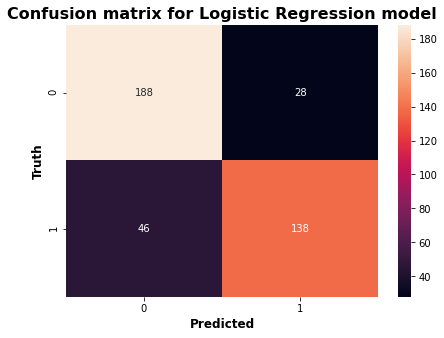

In [243]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_LR, annot = True, fmt = 'd')
plt.title('Confusion matrix for Logistic Regression model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross Validation

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Distinct accuracies for SVM :  [87.5   76.875 85.    84.375 86.875 76.875 85.    85.    86.875 86.25 ]
Average Accuracy SVM : 84.06 %
Standard Deviation in SVM accuracies : 3.72 %


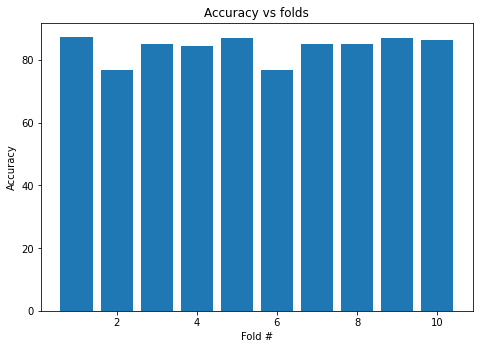

In [244]:
# For SVM
from sklearn.model_selection import cross_val_score
lr_accuracies = cross_val_score(estimator = LR_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for SVM : ", lr_accuracies*100)
print("Average Accuracy SVM : {:.2f} %".format(lr_accuracies.mean()*100))
print("Standard Deviation in SVM accuracies : {:.2f} %".format(lr_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(lr_accuracies)+1), lr_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## Decision Tree

In [245]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Hyper-parameter tuning


In [246]:
# Creating Parameter Space
# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X_train.shape[1]+1,1))

# Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = {'criterion' : criterion, 'max_depth' : max_depth}

grid_search = GridSearchCV(estimator = dt_classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("BEST Accuracy Random Forest : {:.2f} %".format(best_accuracy*100))
print("BEST params for Random Forest : ", best_params)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"% (mean*100, std*100*2, params))

BEST Accuracy Random Forest : 95.50 %
BEST params for Random Forest :  {'criterion': 'gini', 'max_depth': 6}
93.4375 (+/-3.9231) for {'criterion': 'gini', 'max_depth': 2}
94.4375 (+/-4.6921) for {'criterion': 'gini', 'max_depth': 4}
95.5000 (+/-3.5267) for {'criterion': 'gini', 'max_depth': 6}
95.4375 (+/-3.8750) for {'criterion': 'gini', 'max_depth': 8}
95.1250 (+/-3.0516) for {'criterion': 'gini', 'max_depth': 10}
95.1250 (+/-3.3448) for {'criterion': 'gini', 'max_depth': 12}
93.4375 (+/-3.9231) for {'criterion': 'entropy', 'max_depth': 2}
95.1250 (+/-3.6572) for {'criterion': 'entropy', 'max_depth': 4}
94.8750 (+/-3.1024) for {'criterion': 'entropy', 'max_depth': 6}
95.1250 (+/-3.9449) for {'criterion': 'entropy', 'max_depth': 8}
94.8125 (+/-2.3750) for {'criterion': 'entropy', 'max_depth': 10}
95.1250 (+/-2.4238) for {'criterion': 'entropy', 'max_depth': 12}


In [247]:
y_pred_DT = dt_classifier.predict(X_test)

In [248]:
cm_DT = confusion_matrix(Y_test, y_pred_DT)
print(cm_DT)
print(accuracy_score(Y_test, y_pred_DT)*100, "% accuracy is achieved")

[[205  11]
 [ 17 167]]
93.0 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

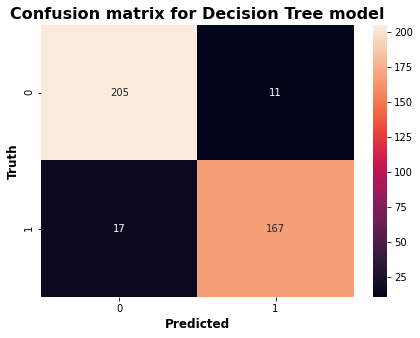

In [249]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_DT, annot = True, fmt = 'd')
plt.title('Confusion matrix for Decision Tree model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross Validation



Distinct accuracies for SVM :  [93.75  94.375 93.75  94.375 95.625 95.    91.25  96.25  95.625 95.   ]
Average Accuracy SVM : 94.50 %
Standard Deviation in SVM accuracies : 1.33 %


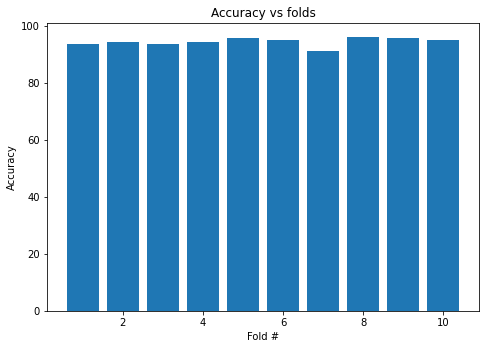

In [250]:
# For SVM
from sklearn.model_selection import cross_val_score
dt_accuracies = cross_val_score(estimator = dt_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for SVM : ", dt_accuracies*100)
print("Average Accuracy SVM : {:.2f} %".format(dt_accuracies.mean()*100))
print("Standard Deviation in SVM accuracies : {:.2f} %".format(dt_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(dt_accuracies)+1), dt_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## Naive Bayes

In [251]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [252]:
y_pred_NB = nb_classifier.predict(X_test)

In [253]:
cm_NB = confusion_matrix(Y_test, y_pred_NB)
print(cm_NB)
print(accuracy_score(Y_test, y_pred_NB),"% accuracy is achieved")

[[167  49]
 [ 22 162]]
0.8225 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

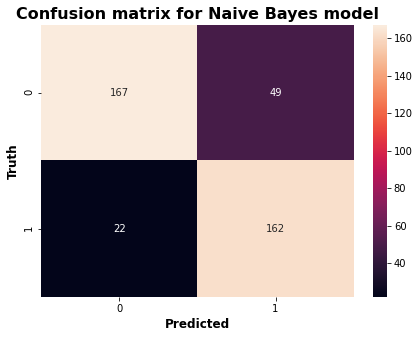

In [254]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_NB, annot = True, fmt = 'd')
plt.title('Confusion matrix for Naive Bayes model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross Validation

Distinct accuracies for NB :  [78.75  82.5   83.125 85.625 81.25  78.75  81.25  83.125 81.875 85.625]
Average Accuracy NB : 82.19 %
Standard Deviation in NB accuracies : 2.26 %


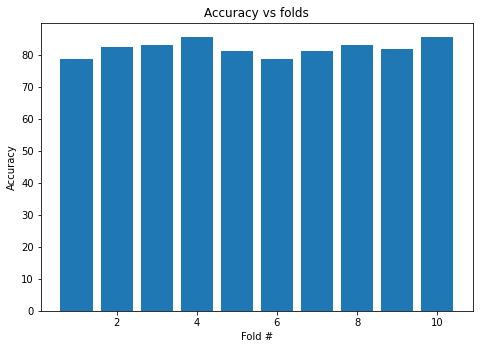

In [255]:
from sklearn.model_selection import cross_val_score
nb_accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for NB : ", nb_accuracies*100)
print("Average Accuracy NB : {:.2f} %".format(nb_accuracies.mean()*100))
print("Standard Deviation in NB accuracies : {:.2f} %".format(nb_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(nb_accuracies)+1), nb_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Hyper prameter tuning

In [257]:
parameters = {'max_depth': [10], 'n_estimators': [40, 50, 70, 80, 100, 120, 150, 170, 200]}

grid_search = GridSearchCV(estimator = rf_classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("BEST Accuracy Random Forest : {:.2f} %".format(best_accuracy*100))
print("BEST params for Random Forest : ", best_params)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"% (mean*100, std*100*2, params))

BEST Accuracy Random Forest : 96.38 %
BEST params for Random Forest :  {'max_depth': 10, 'n_estimators': 150}
96.3125 (+/-3.2331) for {'max_depth': 10, 'n_estimators': 40}
96.1875 (+/-3.1350) for {'max_depth': 10, 'n_estimators': 50}
96.3125 (+/-3.1350) for {'max_depth': 10, 'n_estimators': 70}
96.3125 (+/-3.0337) for {'max_depth': 10, 'n_estimators': 80}
96.2500 (+/-3.2113) for {'max_depth': 10, 'n_estimators': 100}
96.1875 (+/-3.3284) for {'max_depth': 10, 'n_estimators': 120}
96.3750 (+/-3.1524) for {'max_depth': 10, 'n_estimators': 150}
96.1250 (+/-3.4369) for {'max_depth': 10, 'n_estimators': 170}
96.0625 (+/-3.6679) for {'max_depth': 10, 'n_estimators': 200}


In [258]:
y_pred_RF = rf_classifier.predict(X_test)

In [259]:
cm_RF = confusion_matrix(Y_test, y_pred_RF)
print(cm_RF)
accuracy_score(Y_test, y_pred_RF)

[[214   2]
 [ 20 164]]


0.945

Text(42.0, 0.5, 'Truth')

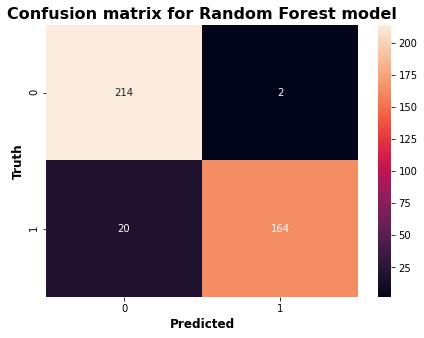

In [260]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_RF, annot = True, fmt = 'd')
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.title('Confusion matrix for Random Forest model', fontweight = 'bold', fontsize = 16)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross validatoin

Distinct accuracies for NB :  [95.625 96.875 93.125 95.    96.875 93.125 92.5   96.25  96.25  96.25 ]
Average Accuracy NB : 95.19 %
Standard Deviation in NB accuracies : 1.58 %


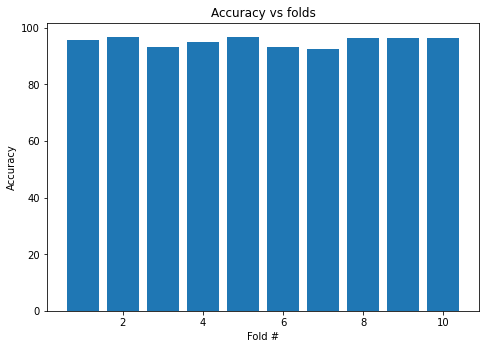

In [261]:
from sklearn.model_selection import cross_val_score
rf_accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for NB : ", rf_accuracies*100)
print("Average Accuracy NB : {:.2f} %".format(rf_accuracies.mean()*100))
print("Standard Deviation in NB accuracies : {:.2f} %".format(rf_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(rf_accuracies)+1), rf_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## K-Nearest Neighbours

In [262]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### Hyper parameter tuning

In [263]:
parameters = {'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'metric' : ['minkowski'], 'p' : [2]}

grid_search = GridSearchCV(estimator = knn_classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("BEST Accuracy KNN : {:.2f} %".format(best_accuracy*100))
print("BEST params for KNN : ", best_params)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.4f (+/-%0.04f) for %r"% (mean*100, std*100*2, params))

BEST Accuracy KNN : 95.19 %
BEST params for KNN :  {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}
95.1875 (+/-2.7979) for {'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}
95.1875 (+/-2.6250) for {'metric': 'minkowski', 'n_neighbors': 10, 'p': 2}
94.5625 (+/-3.1647) for {'metric': 'minkowski', 'n_neighbors': 15, 'p': 2}
93.9375 (+/-3.9151) for {'metric': 'minkowski', 'n_neighbors': 20, 'p': 2}
93.7500 (+/-3.9131) for {'metric': 'minkowski', 'n_neighbors': 25, 'p': 2}
93.5000 (+/-4.1155) for {'metric': 'minkowski', 'n_neighbors': 30, 'p': 2}
92.9375 (+/-4.1098) for {'metric': 'minkowski', 'n_neighbors': 35, 'p': 2}
92.4375 (+/-3.7687) for {'metric': 'minkowski', 'n_neighbors': 40, 'p': 2}
91.8750 (+/-4.0311) for {'metric': 'minkowski', 'n_neighbors': 45, 'p': 2}
91.5625 (+/-3.5904) for {'metric': 'minkowski', 'n_neighbors': 50, 'p': 2}


In [264]:
y_pred_KNN = knn_classifier.predict(X_test)

In [265]:
cm_KNN = confusion_matrix(Y_test, y_pred_KNN)
print(cm_KNN)
print(accuracy_score(Y_test, y_pred_KNN)*100, "% accuracy is achieved")

[[209   7]
 [ 21 163]]
93.0 % accuracy is achieved


Text(42.0, 0.5, 'Truth')

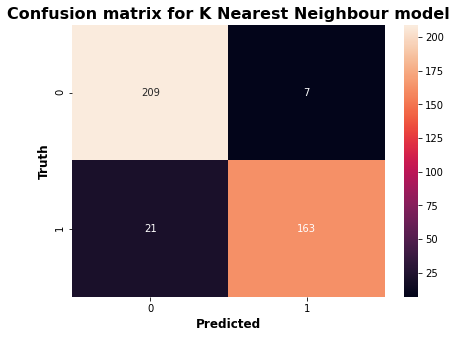

In [266]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_KNN, annot = True, fmt = 'd')
plt.title('Confusion matrix for K Nearest Neighbour model', fontweight = 'bold', fontsize = 16)
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

### K-Fold Cross validation for KNN

Distinct accuracies for KNN :  [95.625 96.25  95.    95.625 96.25  93.125 92.5   95.625 95.    96.875]
Average Accuracy KNN : 95.19 %
Standard Deviation in KNN accuracies : 1.31 %


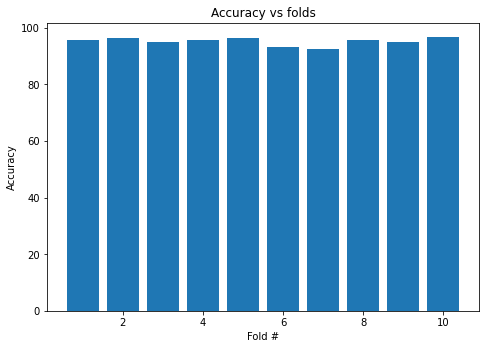

In [267]:
from sklearn.model_selection import cross_val_score
knn_accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = Y_train, cv = 10)
print("Distinct accuracies for KNN : ", knn_accuracies*100)
print("Average Accuracy KNN : {:.2f} %".format(knn_accuracies.mean()*100))
print("Standard Deviation in KNN accuracies : {:.2f} %".format(knn_accuracies.std()*100))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,len(knn_accuracies)+1), knn_accuracies*100)
plt.xlabel("Fold #")
plt.ylabel("Accuracy")
plt.title("Accuracy vs folds")
plt.show()

## Neural Network

In [279]:
X_train, X_validation, Y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.2)

In [280]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import regularizers

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=24, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann.add(keras.layers.Dropout(0.1))

#ann.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
#ann.add(keras.layers.Dropout(0.3))

#ann.add(tf.keras.layers.Dense(units=48, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
#ann.add(keras.layers.Dropout(0.1))

ann.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
ann.add(keras.layers.Dropout(0.1))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #probability of getting 

In [281]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#ann.summary()
# train model
X_train = X_train.astype(np.float64)
Y_train = Y_train.astype(np.float64)
X_test = X_train.astype(np.float64)
Y_test = Y_train.astype(np.float64)
history = ann.fit(X_train, Y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=150)

Epoch 1/150
21/21 [==============================] - 1s 15ms/step - loss: 2.1133 - accuracy: 0.5171 - val_loss: 0.5410 - val_accuracy: 0.7744
Epoch 2/150
21/21 [==============================] - 0s 4ms/step - loss: 1.3029 - accuracy: 0.5829 - val_loss: 0.4834 - val_accuracy: 0.8963
Epoch 3/150
21/21 [==============================] - 0s 4ms/step - loss: 1.0898 - accuracy: 0.5986 - val_loss: 0.5030 - val_accuracy: 0.7500
Epoch 4/150
21/21 [==============================] - 0s 4ms/step - loss: 1.0263 - accuracy: 0.6174 - val_loss: 0.4601 - val_accuracy: 0.8659
Epoch 5/150
21/21 [==============================] - 0s 4ms/step - loss: 0.8974 - accuracy: 0.6498 - val_loss: 0.4614 - val_accuracy: 0.9268
Epoch 6/150
21/21 [==============================] - 0s 4ms/step - loss: 0.7570 - accuracy: 0.6869 - val_loss: 0.4479 - val_accuracy: 0.8841
Epoch 7/150
21/21 [==============================] - 0s 4ms/step - loss: 0.7442 - accuracy: 0.6648 - val_loss: 0.4522 - val_accuracy: 0.8293
Epoch 8/150


In [282]:
# evaluate model on test set
test_loss, test_acc = ann.evaluate(X_test, Y_test, verbose=1)
print('\nTest accuracy:', test_acc)

21/21 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9282

Test accuracy: 0.9282442927360535


In [284]:
Y_pred = ann.predict(X_test)
Y_pred = (Y_pred>0.5) #since we are working on probability
np.concatenate((Y_pred.reshape(len(Y_pred),1), np.array(Y_test).reshape(len(np.array(Y_test)),1)),1)

array([[1., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 0.],
       [1., 1.],
       [0., 1.]])

In [285]:
X_test.shape

(655, 6)

In [287]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_true = np.array(Y_test)
cm_ANN = confusion_matrix(Y_true, Y_pred)
print(accuracy_score(Y_true, Y_pred)*100, "% accuracy achived")
print(cm_ANN)

92.82442748091603 % accuracy achived
[[356  11]
 [ 36 252]]


Text(42.0, 0.5, 'Truth')

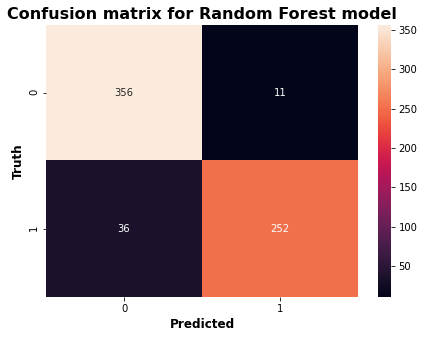

In [288]:
plt.figure(figsize = (7,5))
sn.heatmap(cm_ANN, annot = True, fmt = 'd')
plt.xlabel('Predicted', fontweight = 'bold', fontsize = 12)
plt.title('Confusion matrix for Random Forest model', fontweight = 'bold', fontsize = 16)
plt.ylabel('Truth', fontweight = 'bold', fontsize = 12)

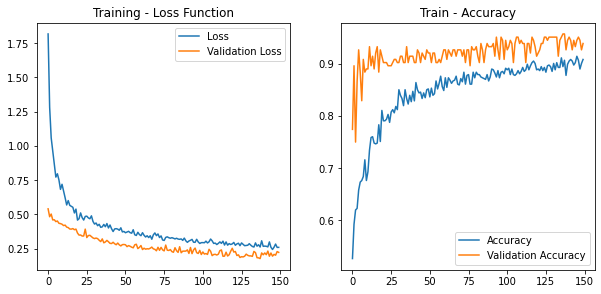

In [290]:
def plot_history(history): # Training history of model
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training - Loss Function')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Train - Accuracy')

    plt.show()

plot_history(history)